In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scienceplots

from nanonets import Simulation
from nanonets.utils import fft, harmonic_strength, total_harmonic_distortion, BLUE_COLOR
from matplotlib.animation import FuncAnimation
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

plt.style.use(["science","bright","grid"])
PATH    = "../data/gated_switch/"
PATH2   = "/home/j/j_mens07/bagheera/data/2_funding_period/dynamic/AC/amp_freq/"
PATH2   = "/home/j/j_mens07/bagheera/data/2_funding_period/dynamic/AC/amp_freq/"

In [3]:
N_NP            = 9
N_ELECTRODES    = 8
N_PERIODS       = 100
SAMPLE_P_PERIOD = 40
AMPLITUDE       = 0.02
FREQUENCY       = 28.0
N_CONTROL       = 3
CONTROL_VALUES  = [-0.010,-0.008,-0.006,-0.004,-0.002,0.002,0.004,0.006,0.008,0.01]

### Electric Current

In [4]:
e_type  = 'constant'
dt      = 1/(40 * FREQUENCY * 1e6)
N_steps = int(np.ceil((N_PERIODS / (FREQUENCY * 1e6)) / dt))
time    = dt*np.arange(N_steps)
data    = {Uc : pd.read_csv(f"{PATH}Nx=9_Ny=9_Ne=8_{FREQUENCY:.3f}_{AMPLITUDE:.3f}_{Uc:.3f}.csv") for Uc in CONTROL_VALUES}
data2   = pd.read_csv(f"{PATH2}Nx=9_Ny=9_Ne=8_{FREQUENCY:.3f}_{AMPLITUDE:.3f}_constant.csv")

FileNotFoundError: [Errno 2] No such file or directory: '../data/gated_switch/Nx=9_Ny=9_Ne=8_28.000_0.020_-0.010.csv'

### Single Signal

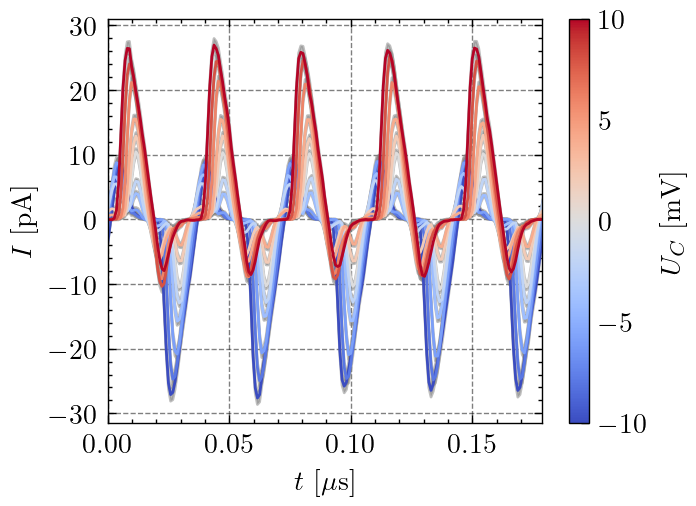

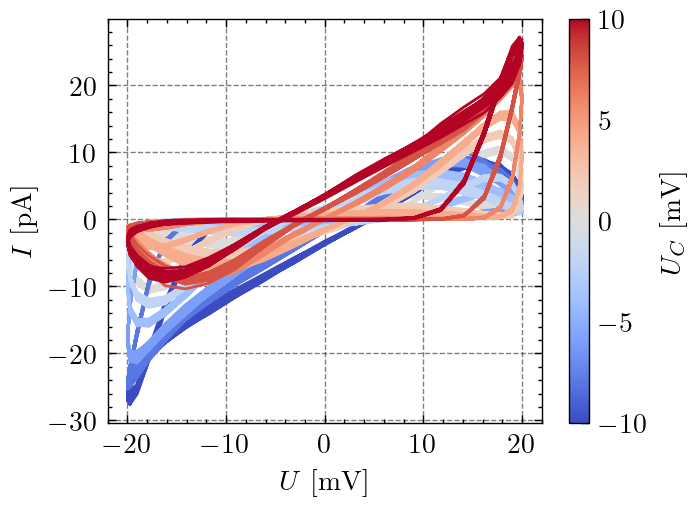

In [ ]:
n_sk    = 80
n_p     = 5
t       = time[:-1][:-n_sk*SAMPLE_P_PERIOD]*1e6
cm      = plt.get_cmap('coolwarm')
norm    = Normalize(vmin=np.min(CONTROL_VALUES)*1000, vmax=np.max(CONTROL_VALUES)*1000)

fig = plt.figure(dpi=200)
ax  = fig.add_subplot()

x   = data2['E0'].values[n_sk*SAMPLE_P_PERIOD:]*1000
y   = data2['Observable'].values[n_sk*SAMPLE_P_PERIOD:]*1e-6
y_e = data2['Error'].values[n_sk*SAMPLE_P_PERIOD:]*1e-6
ax.plot(t, y, color=cm(norm(0)))
ax.fill_between(t, y-y_e, y+y_e, alpha=0.5, color='grey')

for U_c in CONTROL_VALUES:
    x   = data[U_c]['E0'].values[n_sk*SAMPLE_P_PERIOD:]*1000
    y   = data[U_c]['Observable'].values[n_sk*SAMPLE_P_PERIOD:]*1e-6
    y_e = data[U_c]['Error'].values[n_sk*SAMPLE_P_PERIOD:]*1e-6

    ax.plot(t, y, color=cm(norm(U_c*1000)))
    ax.fill_between(t, y-y_e, y+y_e, alpha=0.5, color='grey')

ax.set_xlabel("$t$ [$\mu$s]")
ax.set_ylabel("$I$ [pA]")
ax.set_xlim(0, t[n_p*SAMPLE_P_PERIOD])

sm  = ScalarMappable(cmap=cm, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label("$U_C$ [mV]")

fig.savefig(f"plots/gated_switch/svg/output_{FREQUENCY:.3f}_{AMPLITUDE:.3f}.svg", transparent=True)
fig.savefig(f"plots/gated_switch/pdf/output_{FREQUENCY:.3f}_{AMPLITUDE:.3f}.pdf", transparent=False)
fig.savefig(f"plots/gated_switch/png/output_{FREQUENCY:.3f}_{AMPLITUDE:.3f}.png", transparent=False)


fig = plt.figure(dpi=200)
ax  = fig.add_subplot()

x   = data2['E0'].values[n_sk*SAMPLE_P_PERIOD:]*1000
y   = data2['Observable'].values[n_sk*SAMPLE_P_PERIOD:]*1e-6
y_e = data2['Error'].values[n_sk*SAMPLE_P_PERIOD:]*1e-6
ax.plot(x, y, color=cm(norm(0)))

for U_c in CONTROL_VALUES:
    x   = data[U_c]['E0'].values[n_sk*SAMPLE_P_PERIOD:]*1000
    y   = data[U_c]['Observable'].values[n_sk*SAMPLE_P_PERIOD:]*1e-6
    y_e = data[U_c]['Error'].values[n_sk*SAMPLE_P_PERIOD:]*1e-6

    ax.plot(x, y, color=cm(norm(U_c*1000)))
    
ax.set_xlabel("$U$ [mV]")
ax.set_ylabel("$I$ [pA]")

sm  = ScalarMappable(cmap=cm, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label("$U_C$ [mV]")

fig.savefig(f"plots/gated_switch/svg/phase_{FREQUENCY:.3f}_{AMPLITUDE:.3f}.svg", transparent=True)
fig.savefig(f"plots/gated_switch/pdf/phase_{FREQUENCY:.3f}_{AMPLITUDE:.3f}.pdf", transparent=False)
fig.savefig(f"plots/gated_switch/png/phase_{FREQUENCY:.3f}_{AMPLITUDE:.3f}.png", transparent=False)

In [68]:
y_ss = []
rms  = []
for U_c in CONTROL_VALUES:
    y_ss.append(np.mean(data[U_c]['Observable'].values[n_sk*SAMPLE_P_PERIOD:]*1e-6))
    rms.append(np.sqrt(np.mean((data[U_c]['Observable'].values[n_sk*SAMPLE_P_PERIOD:]*1e-6)**2)))

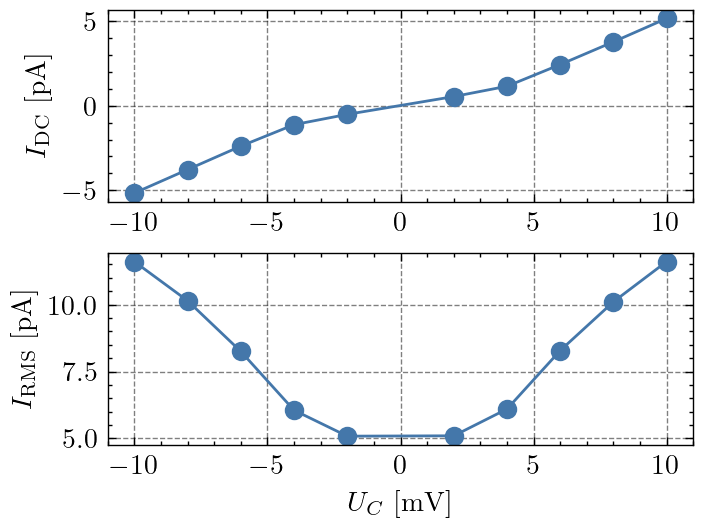

In [ ]:
fig = plt.figure(dpi=200, layout='constrained')
ax  = fig.add_subplot(2,1,1)
ax.plot(np.array(CONTROL_VALUES)*1000, y_ss, 'o-')
ax.set_ylabel("$I_{\\text{DC}}$ [pA]")
ax  = fig.add_subplot(2,1,2)
ax.plot(np.array(CONTROL_VALUES)*1000, rms, 'o-')
ax.set_ylabel("$I_{\\text{RMS}}$ [pA]")
ax.set_xlabel("$U_C$ [mV]")

fig.savefig(f"plots/gated_switch/svg/dc_{FREQUENCY:.3f}_{AMPLITUDE:.3f}.svg", transparent=True)
fig.savefig(f"plots/gated_switch/pdf/dc_{FREQUENCY:.3f}_{AMPLITUDE:.3f}.pdf", transparent=False)
fig.savefig(f"plots/gated_switch/png/dc_{FREQUENCY:.3f}_{AMPLITUDE:.3f}.png", transparent=False)

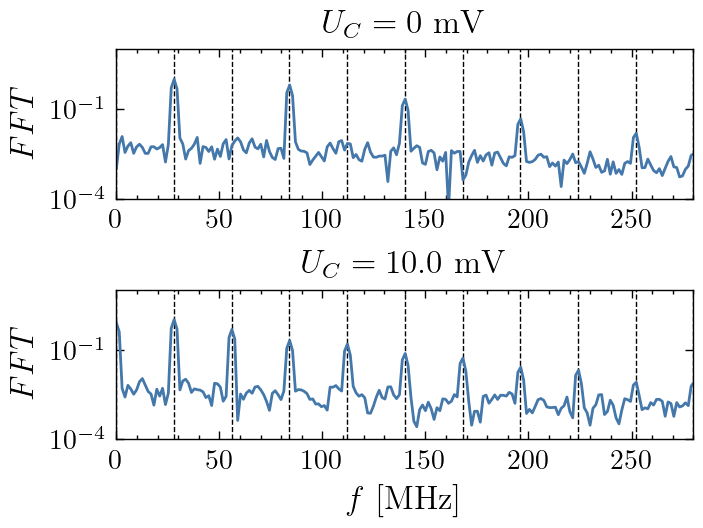

In [ ]:
U_c     = 0.01
y       = data[U_c]['Observable'].values[n_sk*SAMPLE_P_PERIOD:]*1e-6
y2      = data2['Observable'].values[n_sk*SAMPLE_P_PERIOD:]*1e-6
xf, yf   = fft(y, dt=dt, use_hann=True)
xf2, yf2 = fft(y2, dt=dt, use_hann=True)

fig = plt.figure(dpi=200, layout='constrained')
ax1 = fig.add_subplot(2,1,1)
for i in range(16):
    ax1.vlines(i*FREQUENCY, 1e-4, 1e1, color='black', ls='--', lw=.5)
ax1.plot(xf2*1e-6, yf2/np.max(yf2))
ax1.set_yscale('log')
ax1.set_xlim(0.0, 10*FREQUENCY)
ax1.set_ylim(1e-4, 1e1)
ax1.set_ylabel("$FFT$", fontsize='large')
ax1.grid(False)
ax1.set_title(f"$U_C = {0*1000}$ mV")

ax1 = fig.add_subplot(2,1,2)
for i in range(16):
    ax1.vlines(i*FREQUENCY, 1e-4, 1e1, color='black', ls='--', lw=.5)
ax1.plot(xf*1e-6, yf/np.max(yf))
ax1.set_yscale('log')
ax1.set_xlim(0.0, 10*FREQUENCY)
ax1.set_ylim(1e-4, 1e1)
ax1.set_xlabel("$f$ [MHz]", fontsize='large')
ax1.set_ylabel("$FFT$", fontsize='large')
ax1.grid(False)
ax1.set_title(f"$U_C = {U_c*1000}$ mV")

fig.savefig(f"plots/gated_switch/png/fft_{FREQUENCY:.3f}_{AMPLITUDE:.3f}_{U_c:.3f}.svg", transparent=True)
fig.savefig(f"plots/gated_switch/pdf/fft_{FREQUENCY:.3f}_{AMPLITUDE:.3f}_{U_c:.3f}.pdf", transparent=False)
fig.savefig(f"plots/gated_switch/png/fft_{FREQUENCY:.3f}_{AMPLITUDE:.3f}_{U_c:.3f}.png", transparent=False)